In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Example of Dropna
With self made data set


In [2]:
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                  "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT], "Age":['a', 98, np.nan]})
df

,name,toy,born,Age
0,Alfred,NaN,NaT,a
1,Batman,Batmobile,1940-04-25,98
2,Catwoman,Bullwhip,NaT,NaN


TypeError: 98 is not a string

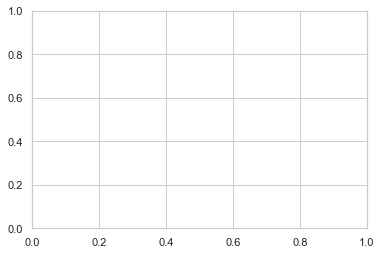

In [3]:
plt.plot(df.Age) # Plotting the age will reveal that there is something wrong!
# See the error below: --> 188                 raise TypeError("{val!r} is not a string".format(val=val))

In [4]:
df.drop(labels='Age', axis=1, inplace=True)  # dropping the Age column as it is heavily polluted
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


Drop the columns where at least one element is missing

In [5]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


Drop the rows where all elements are missing.

In [6]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


Keep only the rows with at least 2 non-NA values.

In [7]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


Define in which columns to look for missing values.

In [8]:
df.dropna(subset=['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


Keep the DataFrame with valid entries in the same variable.

In [9]:
df.dropna(inplace=True)
df  # Notice inplace=True doesn't print the result but stores the result in df

,name,toy,born
1,Batman,Batmobile,1940-04-25


## Murders, she wrote

Below is a big dataset in which there is a lot of data, but also missing  / NaN etc...You can play with this set.
<br>
<br>
- assignment: in read_csv there is an option to deal with NaN values. <br>
Converting values to NaN values while importing, is a quick option to deal with data. For instance, you might want to convert NULL values to NaN, so you can drop the columns later on.
<br>
Check: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html


In [10]:
data = pd.read_csv('murder.csv') # Depeding on your file, check the delimeter


C:\Users\NL27514\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [12]:
data = pd.read_csv('murder.csv', header=0, delimiter = ',', low_memory=False)  # fixed warning

In [13]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [14]:
data.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

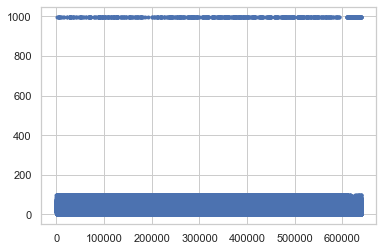

In [15]:
plt.plot(data['Victim Age'], 'b.')

Here you see that there are some high values for the age !!

In [16]:
# Check the maximum Victim Age
data['Victim Age'].max()

998

In [17]:
# Check the occurrence
data[data['Victim Age']>=100]['Victim Age'].count()

974

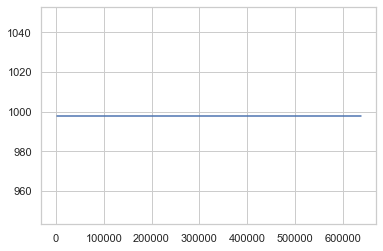

In [18]:
# Check the ages >=100 
plt.plot(data[data['Victim Age']>100]['Victim Age'])


Conclusion: <br>
What can be concluded on the age 998? Is this a typo or is does this mean that this is actually a NaN? <br>

<b> Assignment 1: solve the issues for 998. Do you drop the values? 


In [111]:
# <your code here>

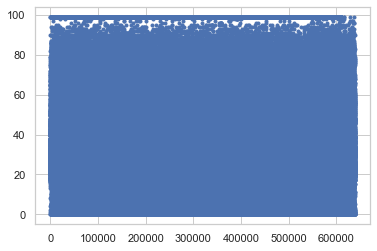

In [19]:
# Sclice and get the complte data set for ages <100 
new_df = data[data['Victim Age']<100].copy()
plt.plot(new_df['Victim Age'], 'b.')

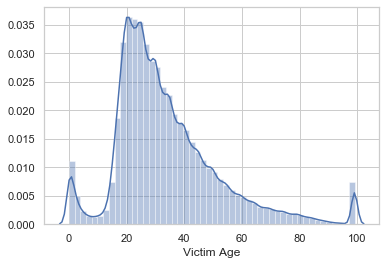

In [20]:
sns.distplot(new_df['Victim Age'])  # check the distribution of Victim Age after '998' has been removed

<b> Assignment 2: solve the issue for Age (victim, purpetrator = 0) <b>
<br>Question: how many rows are remaining?
   

In [114]:
#<your code here>

In [21]:
print(new_df['Perpetrator Age'].dtypes)
new_df['Perpetrator Age'].head()

object


0    15
1    42
2     0
3    42
4     0
Name: Perpetrator Age, dtype: object

In [22]:
new_df['Perpetrator Age'].astype(int)  # Returns error because Perp Age column includes the value: ' '

ValueError: invalid literal for int() with base 10: ' '

In [23]:
# option 1
new_df['Perpetrator Age'] = new_df['Perpetrator Age'].str.replace(' ', '998')
new_df['Perpetrator Age'] = new_df['Perpetrator Age'].astype(int)

print('Cases where the Perpetrator Age is zero: ', (new_df['Perpetrator Age'] == 0).sum())
print('Cases where the Perpetrator Age is Unknown: ', (new_df['Perpetrator Age'] == 998).sum())

Cases where the Perpetrator Age is zero:  215687
Cases where the Perpetrator Age is Unknown:  1


In [24]:
# option 2
new_df['Perpetrator Age'] = new_df['Perpetrator Age'].str.strip() # removes whitespace
new_df['Perpetrator Age'] = new_df['Perpetrator Age'].apply(lambda x: np.nan if x=='' else int(x))

print('Cases where the Perpetrator Age is zero: ', (new_df['Perpetrator Age'] == 0).sum())
print('Cases where the Perpetrator Age is Unknown: ', new_df['Perpetrator Age'].isna().sum())

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

<b> Assignment 3: go over the notebook 03.04-Missing-Values.ipynb

<b> Assignment 4: Fix the missing (if any) categorical Data

In [ ]:
# hints

# categorical data: http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm

# Go To: Data exploration OR:
# Extra material, tips, hints

In [120]:
data['City']

0               Anchorage
1               Anchorage
2               Anchorage
3               Anchorage
4               Anchorage
5               Anchorage
6               Anchorage
7               Anchorage
8               Anchorage
9               Anchorage
10              Anchorage
11              Anchorage
12              Anchorage
13              Anchorage
14              Anchorage
15              Anchorage
16              Anchorage
17                 Juneau
18                   Nome
19                 Bethel
20            North Slope
21            North Slope
22            North Slope
23            North Slope
24            North Slope
25        Kenai Peninsula
26                 Juneau
27                 Juneau
28                 Juneau
29                 Juneau
               ...       
638424            Preston
638425              Boone
638426         Monongalia
638427         Monongalia
638428               Wood
638429             Mercer
638430            Braxton
638431      

In [121]:
data = data.dropna()

In [25]:
data2_state = data.groupby(['Year', 'State'], as_index = False).agg({ 'Incident': np.size})
data2_state.set_index('Year')


,State,Incident
Year,,
1980,Alabama,513
1980,Alaska,47
1980,Arizona,293
1980,Arkansas,214
1980,California,3590
1980,Colorado,198
1980,Connecticut,158
1980,Delaware,44
1980,District of Columbia,180


In [26]:
inwoners = pd.read_csv('Inwoners.csv', header=0, delimiter = ';') 

FileNotFoundError: [Errno 2] File b'Inwoners.csv' does not exist: b'Inwoners.csv'

In [124]:
inwoners.head(10)
inwoners.set_index('Year')

,State,Population
Year,,
1980,Alabama,3893888.0
1980,Alaska,401851.0
1980,Arizona,2718215.0
1980,Arkansas,2286435.0
1980,California,23667902.0
1980,Colorado,2889964.0
1980,Connecticut,3107576.0
1980,Delaware,594338.0
1980,District of Columbia,638333.0


In [125]:
Data_State_Year_Murders_Residence = pd.merge(data2_state, inwoners, on=['Year', 'State'])

Data_State_Year_Murders_Residence.head(10)

,Year,State,Incident,Population
0,1980,Alabama,513,3893888.0
1,1980,Alaska,47,401851.0
2,1980,Arizona,293,2718215.0
3,1980,Arkansas,214,2286435.0
4,1980,California,3590,23667902.0
5,1980,Colorado,198,2889964.0
6,1980,Connecticut,158,3107576.0
7,1980,Delaware,44,594338.0
8,1980,Florida,1508,9746324.0
9,1980,Georgia,475,5463105.0


In [126]:
a= pd.read_csv('Inwoners.csv', header=0, delimiter = ';', index_col = 'Year')
b =pd.read_csv('statemurder.csv', header=0, delimiter = ';', index_col = 'Year')

In [127]:
a

,State,Population
Year,,
1980,Alabama,3893888.0
1980,Alaska,401851.0
1980,Arizona,2718215.0
1980,Arkansas,2286435.0
1980,California,23667902.0
1980,Colorado,2889964.0
1980,Connecticut,3107576.0
1980,Delaware,594338.0
1980,District of Columbia,638333.0


In [128]:
a.columns

Index(['State', 'Population'], dtype='object')

In [129]:
a.stack

<bound method DataFrame.stack of                      State  Population
Year                                  
1980               Alabama   3893888.0
1980                Alaska    401851.0
1980               Arizona   2718215.0
1980              Arkansas   2286435.0
1980            California  23667902.0
1980              Colorado   2889964.0
1980           Connecticut   3107576.0
1980              Delaware    594338.0
1980  District of Columbia    638333.0
1980               Florida   9746324.0
1980               Georgia   5463105.0
1980                Hawaii    964691.0
1980                 Idaho    943935.0
1980              Illinois  11426518.0
1980               Indiana   5490224.0
1980                  Iowa   2913808.0
1980                Kansas   2363679.0
1980              Kentucky   3660777.0
1980             Louisiana   4205900.0
1980                 Maine   1124660.0
1980              Maryland   4216975.0
1980         Massachusetts   5737037.0
1980              Michigan   92

In [15]:
data['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

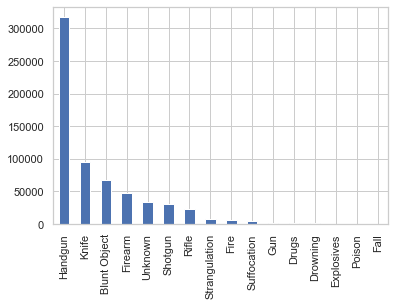

In [20]:
data['Weapon'].value_counts().plot(kind="bar")

Group the guns into one categorie

In [131]:
data['Weapon']=np.where(data['Weapon'] =='Shotgun', 'Gun', data['Weapon'])
data['Weapon']=np.where(data['Weapon'] =='Handgun', 'Gun', data['Weapon'])
data['Weapon']=np.where(data['Weapon'] =='Rifle', 'Gun', data['Weapon'])

In [132]:
data['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Gun', 'Knife',
       'Firearm', 'Fall', 'Drowning', 'Suffocation', 'Explosives', 'Fire',
       'Drugs', 'Poison'], dtype=object)

# Data exploration


What else can you find/clean ?

c:\anaconda3\envs\traineeship\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


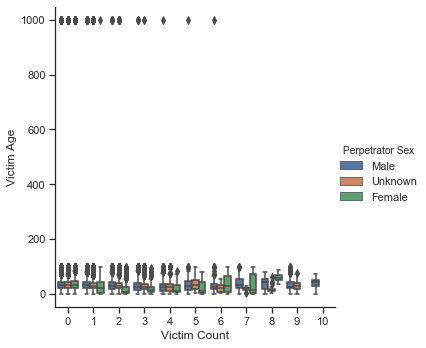

In [133]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Victim Count", "Victim Age", "Perpetrator Sex", data=data, kind="box")
    g.set_axis_labels("Victim Count", "Victim Age");

In [134]:
data.groupby('Weapon').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Weapon,,,,,,
Blunt Object,311015.111855,1995.343095,23.638104,37.719931,0.044107,0.194009
Drowning,268817.142857,1993.127076,4.993355,17.367110,0.169435,0.134551
Drugs,415867.221033,2001.062343,23.347607,36.341940,0.100756,0.205919
Explosives,284116.852886,1993.474860,13.314711,37.098696,3.325885,0.763501
Fall,265612.394737,1992.836842,9.631579,37.394737,0.042105,0.163158
Fire,279301.131865,1993.626438,19.378584,38.686376,1.295480,0.165884
Firearm,411786.399425,2000.909515,46.233780,34.854066,0.135355,0.220732
Gun,314958.706118,1995.551112,21.030386,32.619445,0.126986,0.197432
Knife,284709.120280,1993.989922,20.120006,37.576704,0.069881,0.134601


In [135]:
data.groupby('Crime Type').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Crime Type,,,,,,
Manslaughter by Negligence,339328.693177,1996.946248,66.809237,25.519087,0.081724,0.111123
Murder or Manslaughter,318936.332969,1995.784515,22.332880,35.171329,0.123937,0.186297


In [136]:
data.groupby('Weapon').mean()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Weapon,,,,,,
Blunt Object,311015.111855,1995.343095,23.638104,37.719931,0.044107,0.194009
Drowning,268817.142857,1993.127076,4.993355,17.367110,0.169435,0.134551
Drugs,415867.221033,2001.062343,23.347607,36.341940,0.100756,0.205919
Explosives,284116.852886,1993.474860,13.314711,37.098696,3.325885,0.763501
Fall,265612.394737,1992.836842,9.631579,37.394737,0.042105,0.163158
Fire,279301.131865,1993.626438,19.378584,38.686376,1.295480,0.165884
Firearm,411786.399425,2000.909515,46.233780,34.854066,0.135355,0.220732
Gun,314958.706118,1995.551112,21.030386,32.619445,0.126986,0.197432
Knife,284709.120280,1993.989922,20.120006,37.576704,0.069881,0.134601
